### Moon Data set classification
We are gonna classify moon data using neural network

In [ ]:
# import data sets
import tensorflow as tf
from sklearn.datasets import make_moons
import pandas as pd
n_sample = 1000
moon_data = make_moons(n_samples=n_sample,shuffle=True,noise=0.06)
X, y = moon_data
# Convert loaded data to Dataframe, colum-major data retrieval framwork
moon_dataFrame = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"y":y})
# Visualize row data
print(moon_dataFrame)


           X0        X1  y
0   -0.671770  0.774130  0
1    0.337592 -0.224496  1
2    0.691761  0.659812  0
3    0.109778  0.853645  0
4    0.156888  0.869854  0
..        ...       ... ..
995  1.024793 -0.485384  1
996  1.559882 -0.341786  1
997 -0.580577  0.696124  0
998  0.337973 -0.056510  1
999 -0.659126  0.796242  0

[1000 rows x 3 columns]


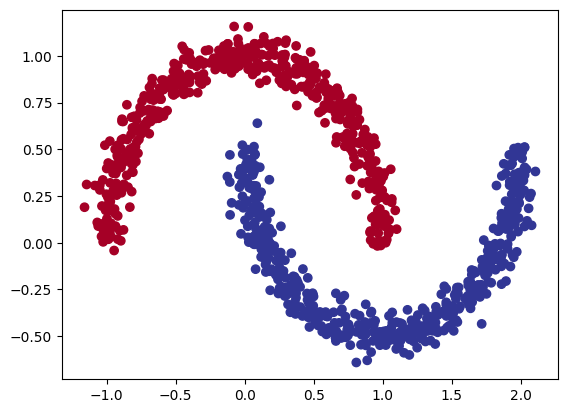

In [ ]:
# visualize data
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,10))
# plt.plot(moon_dataFrame["X1"],moon_dataFrame["X0"])
# # plt.plot(y,moon_dataFrame["X1"],color="green",label="X1")
# plt.legend()
plt.scatter(moon_dataFrame["X0"],moon_dataFrame["X1"],c=moon_dataFrame["y"],cmap=plt.cm.RdYlBu)

### We are gonna to classify two point of x as upper moon or lower moon are they belong
To do so, we have classify data into:
*training Data*- about 80% *validation data*- about 13% and *test data*-about 7% of total data.

In [ ]:
# classify data to for training and testing/validation
from sklearn.model_selection import train_test_split
X_train,X_test_validate,y_train, y_test_validate =train_test_split(X,y, train_size=0.8)



In [ ]:
# classify data for testing and validation
X_test,X_validate,y_test,y_validate = train_test_split(X_test_validate,y_test_validate,train_size=0.45)


### let's build a neural network to find pattern on those data


*   input layer two neurans with Relu activation function
*   about 2 hidden layers four neurons per layer with Relu activation function
* output layer with on neurons with Relu activation function
* Adam optimizer
* Accuracy metrics



In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])
# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
X_train,y_train
history_model_1 = model_1.fit(X_train,y_train, epochs=120)

Epoch 1/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6049 - loss: 0.6608
Epoch 2/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8395 - loss: 0.4583 
Epoch 3/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8393 - loss: 0.3326 
Epoch 4/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8265 - loss: 0.3462 
Epoch 5/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8480 - loss: 0.3000 
Epoch 6/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8607 - loss: 0.2786 
Epoch 7/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8400 - loss: 0.2910 
Epoch 8/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8550 - loss: 0.2722 
Epoch 9/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8551 - loss: 0.2673 
Epoch 10/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8686 - loss: 0.2565 
Epoch 11/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8768 - loss: 0.2432 
Epoch 12/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [18]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (32, 2)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (32, 10)               │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (32, 100)              │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (32, 100)              │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (32, 1)                │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,995 (132.80 KB)

 Trainable params: 11,331 (44.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,664 (88.54 KB)

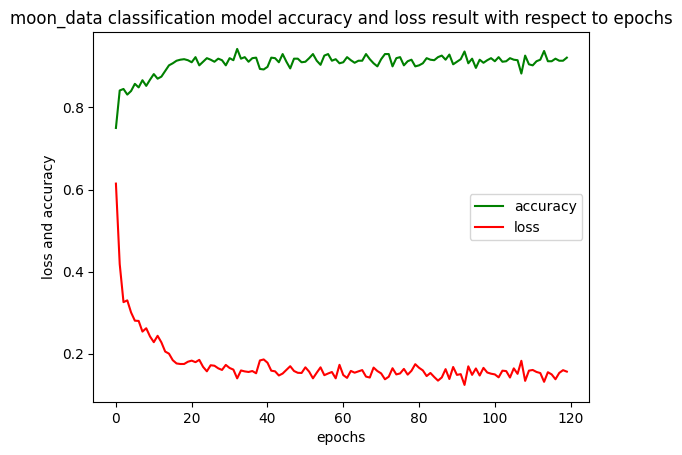

In [19]:
plt.plot(range(len(history_model_1.history["accuracy"])),history_model_1.history["accuracy"] ,color="green", label="accuracy")
plt.plot(range(len(history_model_1.history["loss"])),history_model_1.history["loss"],color="red",label="loss")
plt.title("moon_data classification model accuracy and loss result with respect to epochs")
plt.xlabel("epochs")
plt.ylabel("loss and accuracy")
plt.legend()



In [21]:
model_1.evaluate(X_validate,y_validate)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9849 - loss: 0.0525 


[0.04047130420804024, 0.9909090995788574]

In [22]:
y_pred = model_1.predict(X_test)
y_pred = tf.round(tf.squeeze(y_pred))
result = y_pred == y_test
true_result = [yeah for yeah in result if yeah]
print(f"{(len(true_result)/len(result))*100:.2f}")



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
100.00


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize(data):
  """
  return the normalized version  of tensor between 0 & 1
  """
  min_max_norm_data = (data-data.min())/(data.max()-data.min())
  return min_max_norm_data

scaler = MinMaxScaler()
scaler.fit(X_train)
norm_X_train = scaler.transform(X_train)
norm_X_train
norm_X_validate = scaler.transform(X_validate)
norm_X_test = scaler.transform(X_test)



### model_2 with normalized training,validation,and testing datasets


In [ ]:
# Set seed
tf.random.set_seed(42)
# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_model_2 = model_2.fit(norm_X_train,y_train,
                              epochs=120)

Epoch 1/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7304 - loss: 0.6574
Epoch 2/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8623 - loss: 0.5258
Epoch 3/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8610 - loss: 0.3608
Epoch 4/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8610 - loss: 0.2854 
Epoch 5/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8760 - loss: 0.2633 
Epoch 6/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8879 - loss: 0.2492
Epoch 7/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8931 - loss: 0.2392 
Epoch 8/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8962 - loss: 0.2334 
Epoch 9/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8947 - loss: 0.2296 
Epoch 10/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8954 - loss: 0.2268
Epoch 11/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8936 - loss: 0.2248 
Epoch 12/120
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc

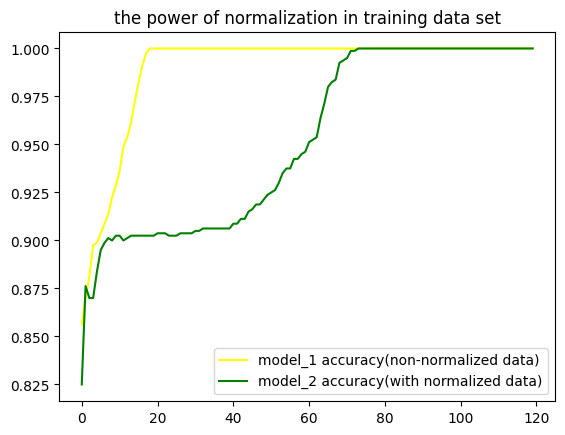

In [ ]:
plt.plot(range(120),history_model_1.history["accuracy"],color="yellow",label="model_1 accuracy(non-normalized data)")
plt.plot(range(120),history_model_2.history["accuracy"],color="green",label="model_2 accuracy(with normalized data)")
plt.title("the power of normalization in training data set")
plt.legend()

In [ ]:
model_1.summary(),model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (32, 10)               │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 100)              │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 100)              │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 1)                │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,995 (132.80 KB)

 Trainable params: 11,331 (44.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,664 (88.54 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (32, 10)               │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 100)              │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 100)              │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 1)                │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,995 (132.80 KB)

 Trainable params: 11,331 (44.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,664 (88.54 KB)

(None, None)

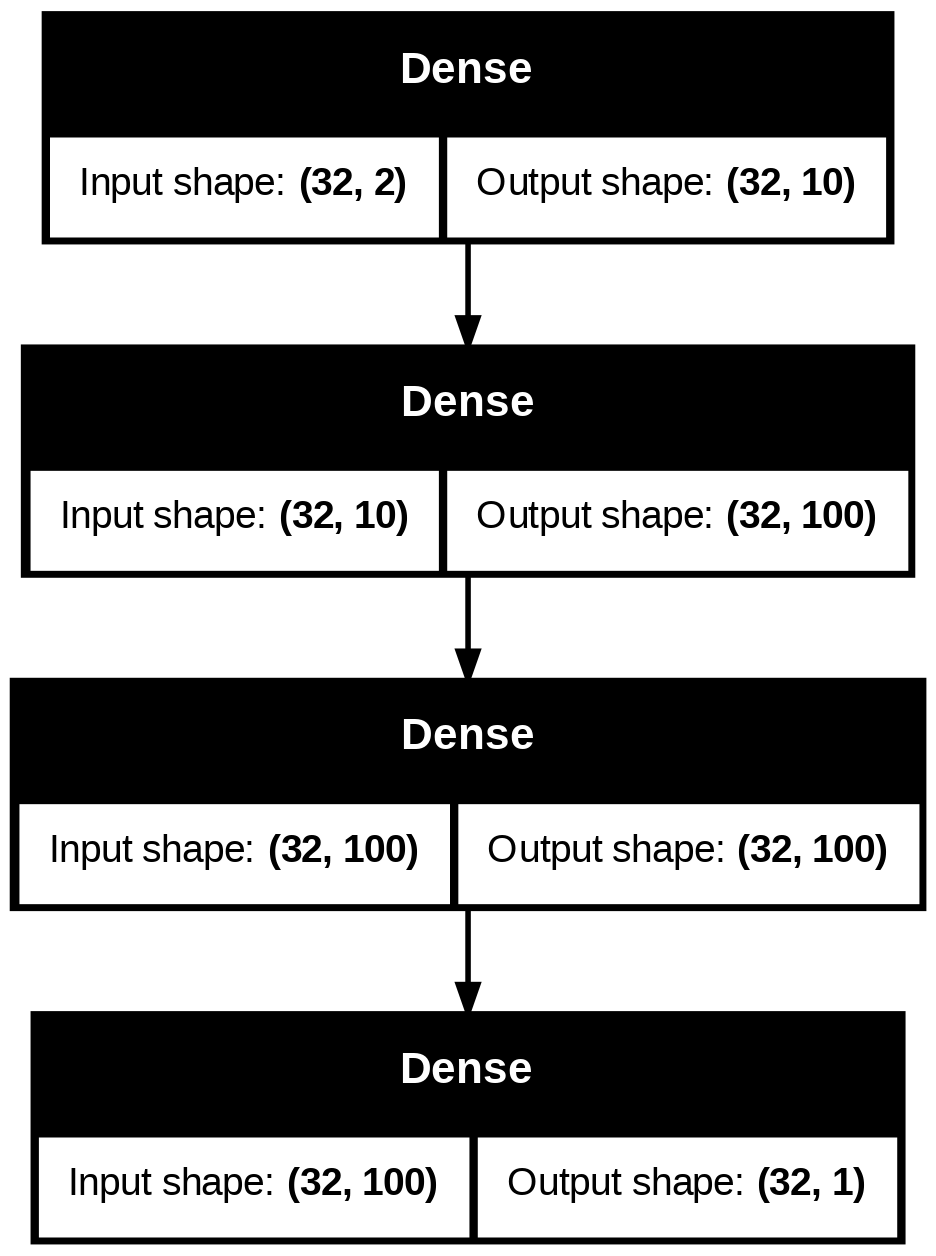

In [ ]:
from keras.utils import plot_model
plot_model(model_2,show_shapes=True)